# **Currency Exchange Rate Prediction Using Python**

**Let's import the necessary Python libraries that are needed for this task and read the dataset**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from seaborn import regression

In [41]:
sns.set_style('whitegrid')

In [42]:
data = pd.read_csv('INR.csv')
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2023-07-25  81.814201  81.907700  81.663002  81.814201  81.814201     0.0
1  2023-07-26  81.950104  82.070396  81.830002  81.950104  81.950104     0.0
2  2023-07-27  81.975502  82.230904  81.883003  81.975502  81.975502     0.0
3  2023-07-28  82.374901  82.375099  82.153999  82.374901  82.374901     0.0
4  2023-07-31  82.252800  82.365997  82.117996  82.252800  82.252800     0.0


In this dataset, the values in the "Close" column are the target values that we need to predict. So let's take a closer look at these values.

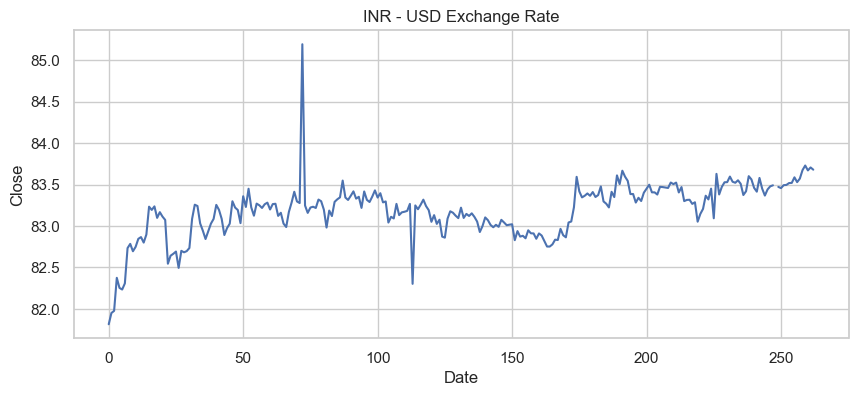

In [43]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data['Close'])
plt.show()

Now let's have a look at the correlation between the features before training the currency exchange rate prediction model.

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.783352  0.733412  0.999973   0.999973     NaN
High       0.783352  1.000000  0.670188  0.783298   0.783298     NaN
Low        0.733412  0.670188  1.000000  0.733201   0.733201     NaN
Close      0.999973  0.783298  0.733201  1.000000   1.000000     NaN
Adj Close  0.999973  0.783298  0.733201  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


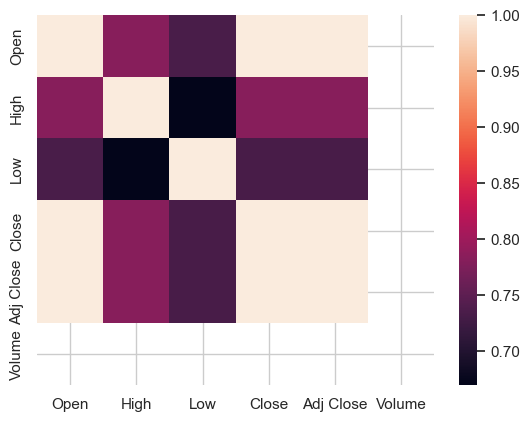

In [44]:
# Filter numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = data_numeric.corr()
print(correlation)
sns.heatmap(correlation)
plt.show()

Now the next step is to prepare the dataset by storing the most relevant features in the variable x and storing the target column in the variable y.

In [45]:
x = data[["Open", "High", "Low"]]
y = data[["Close"]]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

Now let's split the dataset and train a currency exchange prediction model using the Decision Tree Regression Model.

In [58]:
from sklearn.model_selection import train_test_split
xtrain, ytrain, xtest, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# assuming ytrain is a numpy array
ytrain = np.repeat(ytrain, 4, axis=0)  # repeat each label 4 times
ytrain = ytrain[:210]  # remove the last two labels
ytrain = ytrain.reshape(-1, 3)  # reshape to have 3 features
print(ytrain.shape)

(210, 3)


In [70]:
print(xtest.shape)

(70, 3)


In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

Now let's have a look at the predicted values of currency exchange rates of Indian Rupees for next five days.

In [72]:
data = pd.DataFrame(data={"Predicted Data": ypred.flatten()})
print(data.head())

   Predicted Data
0       83.396004
1       83.442596
2       83.346802
3       82.695297
4       82.824799
